In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# import string library for text preprocessing
import string

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('../data/raw/movies_dataset_2000_2023.csv')

In [3]:
df.head()

,Unnamed: 0.1,Movie Title,Plot Summary,Cover Image,Year,Source,Rated,omdb Year,omdb Title,Released,...,Actors,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,BoxOffice,imdbID
0,0.0,The Extreme Adventures of Super Dave,After the kind-hearted but clumsy Super Dave O...,NaN,2000,https://en.wikipedia.org//wiki/The_Extreme_Adv...,PG,2000,The Extreme Adventures of Super Dave,11 Jan 2000,...,"Bob Einstein, Dan Hedaya, Gia Carides, Don Lake","Super Dave Osborne, our accident-prone stuntma...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BNTk2ND...,"{'Source': 'Internet Movie Database', 'Value':...",5.1,NaN,tt0144096
1,1.0,Next Friday,After finding out Deebo escaped prison to get ...,upload.wikimedia.org/wikipedia/en/e/e2/Next_Fr...,2000,https://en.wikipedia.org//wiki/Next_Friday,R,2000,Next Friday,12 Jan 2000,...,"Ice Cube, Mike Epps, Justin Pierce",A streetwise man flees South Central Los Angel...,"English, Spanish",United States,2 nominations,https://m.media-amazon.com/images/M/MV5BZTg4NT...,"[{'Source': 'Internet Movie Database', 'Value'...",6.1,"$57,328,603",tt0195945
2,2.0,Play It to the Bone,Aging prizefighters and longtime best friends ...,upload.wikimedia.org/wikipedia/en/thumb/5/5d/P...,2000,https://en.wikipedia.org//wiki/Play_It_to_the_...,R,1999,Play It to the Bone,21 Jan 2000,...,"Woody Harrelson, Antonio Banderas, Lolita Davi...",Two best friends and former middleweight conte...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMTM2Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",5.5,"$8,434,146",tt0196857
3,3.0,Supernova (2000 film),Supernova chronicles the search-and-rescue pat...,upload.wikimedia.org/wikipedia/en/thumb/0/0a/S...,2000,https://en.wikipedia.org//wiki/Supernova_(2000...,PG-13,2000,Supernova,14 Jan 2000,...,"James Spader, Peter Facinelli, Robin Tunney",A deep space rescue and recovery spaceship wit...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMzRjYT...,"[{'Source': 'Internet Movie Database', 'Value'...",4.8,"$14,230,455",tt0134983
4,4.0,The Boondock Saints,"In Boston, Irish American fraternal twin broth...",upload.wikimedia.org/wikipedia/en/thumb/1/1b/T...,2000,https://en.wikipedia.org//wiki/The_Boondock_Sa...,R,1999,The Boondock Saints,21 Jan 2000,...,"Willem Dafoe, Sean Patrick Flanery, Norman Reedus",Two Irish Catholic brothers become vigilantes ...,"English, Spanish, Papiamento, Russian, Latin","United States, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNTliMT...,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,"$30,471",tt0144117


In [4]:
df.columns

Index(['Unnamed: 0.1', 'Movie Title', 'Plot Summary', 'Cover Image', 'Year',
       'Source', 'Rated', 'omdb Year', 'omdb Title', 'Released', 'Runtime',
       'Genre', 'Director', 'Writer', 'Actors', 'Plot', 'Language', 'Country',
       'Awards', 'Poster', 'Ratings', 'imdbRating', 'BoxOffice', 'imdbID'],
      dtype='object')

In [5]:
df.drop('Unnamed: 0.1', inplace=True, axis=1)

In [6]:
df.shape

(6095, 23)

In [7]:
df.head()

,Movie Title,Plot Summary,Cover Image,Year,Source,Rated,omdb Year,omdb Title,Released,Runtime,...,Actors,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,BoxOffice,imdbID
0,The Extreme Adventures of Super Dave,After the kind-hearted but clumsy Super Dave O...,NaN,2000,https://en.wikipedia.org//wiki/The_Extreme_Adv...,PG,2000,The Extreme Adventures of Super Dave,11 Jan 2000,91 min,...,"Bob Einstein, Dan Hedaya, Gia Carides, Don Lake","Super Dave Osborne, our accident-prone stuntma...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BNTk2ND...,"{'Source': 'Internet Movie Database', 'Value':...",5.1,NaN,tt0144096
1,Next Friday,After finding out Deebo escaped prison to get ...,upload.wikimedia.org/wikipedia/en/e/e2/Next_Fr...,2000,https://en.wikipedia.org//wiki/Next_Friday,R,2000,Next Friday,12 Jan 2000,98 min,...,"Ice Cube, Mike Epps, Justin Pierce",A streetwise man flees South Central Los Angel...,"English, Spanish",United States,2 nominations,https://m.media-amazon.com/images/M/MV5BZTg4NT...,"[{'Source': 'Internet Movie Database', 'Value'...",6.1,"$57,328,603",tt0195945
2,Play It to the Bone,Aging prizefighters and longtime best friends ...,upload.wikimedia.org/wikipedia/en/thumb/5/5d/P...,2000,https://en.wikipedia.org//wiki/Play_It_to_the_...,R,1999,Play It to the Bone,21 Jan 2000,124 min,...,"Woody Harrelson, Antonio Banderas, Lolita Davi...",Two best friends and former middleweight conte...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMTM2Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",5.5,"$8,434,146",tt0196857
3,Supernova (2000 film),Supernova chronicles the search-and-rescue pat...,upload.wikimedia.org/wikipedia/en/thumb/0/0a/S...,2000,https://en.wikipedia.org//wiki/Supernova_(2000...,PG-13,2000,Supernova,14 Jan 2000,90 min,...,"James Spader, Peter Facinelli, Robin Tunney",A deep space rescue and recovery spaceship wit...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMzRjYT...,"[{'Source': 'Internet Movie Database', 'Value'...",4.8,"$14,230,455",tt0134983
4,The Boondock Saints,"In Boston, Irish American fraternal twin broth...",upload.wikimedia.org/wikipedia/en/thumb/1/1b/T...,2000,https://en.wikipedia.org//wiki/The_Boondock_Sa...,R,1999,The Boondock Saints,21 Jan 2000,108 min,...,"Willem Dafoe, Sean Patrick Flanery, Norman Reedus",Two Irish Catholic brothers become vigilantes ...,"English, Spanish, Papiamento, Russian, Latin","United States, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNTliMT...,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,"$30,471",tt0144117


In [8]:
# Convert text to lowercase
def convert_to_lower_case(text):
  return text.lower()

In [9]:
def remove_punctuation(text):
  # Create a translation table to remove punctuation
  translator = str.maketrans('', '', string.punctuation)

  # Remove punctuation using the translation table
  text_without_punct = text.translate(translator)

  return text_without_punct

In [10]:
def tokenize(text):
  # Tokenization
  return word_tokenize(text)

In [11]:
# Remove stopwords
def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english'))
  return [word for word in tokens if word not in stop_words]

In [12]:
def lemmatize(tokens):
  # Lemmatization
  lemmatizer = WordNetLemmatizer()
  return [lemmatizer.lemmatize(word) if lemmatizer.lemmatize(word) is not None else word for word in tokens]

In [13]:
# Remove special characters and numbers
def remove_special_chars(tokens):
    return [re.sub('[^A-Za-z]+', '', word) for word in tokens]

In [14]:
# function to do preprocessing text
def preprocess_text(text):
  lower_text = convert_to_lower_case(text) # converting to lowercase
  removed_punctuation = remove_punctuation(lower_text) # removing punctuation
  tokens = tokenize(removed_punctuation) # tokenize words
  tokens = remove_stop_words(tokens) # removing stop words
  tokens = lemmatize(tokens) # lemmatize tokens
  tokens = remove_special_chars(tokens) # remove special characters from token

  preprocessed_text = ' '.join(tokens) # final preprocessed text
  return preprocessed_text

In [15]:
preprocess_text("Hi!, my name is 123......testing the code noww11111")

'hi name testing code noww'

In [16]:
df.isnull().sum()

Movie Title        0
Plot Summary     539
Cover Image      105
Year               0
Source             0
Rated           5254
omdb Year       5224
omdb Title      5224
Released        5227
Runtime         5234
Genre           5225
Director        5245
Writer          5238
Actors          5228
Plot            5233
Language        5229
Country         5226
Awards          5339
Poster          5231
Ratings         5224
imdbRating      5235
BoxOffice       5333
imdbID          5224
dtype: int64

In [17]:
df.isnull().mean()*100

Movie Title      0.000000
Plot Summary     8.843314
Cover Image      1.722724
Year             0.000000
Source           0.000000
Rated           86.201805
omdb Year       85.709598
omdb Title      85.709598
Released        85.758819
Runtime         85.873667
Genre           85.726005
Director        86.054143
Writer          85.939295
Actors          85.775226
Plot            85.857260
Language        85.791632
Country         85.742412
Awards          87.596390
Poster          85.824446
Ratings         85.709598
imdbRating      85.890074
BoxOffice       87.497949
imdbID          85.709598
dtype: float64

In [18]:
df.dropna(subset=['Plot Summary'], inplace=True)

In [19]:
df.isnull().mean()*100

Movie Title      0.000000
Plot Summary     0.000000
Cover Image      0.485961
Year             0.000000
Source           0.000000
Rated           85.763139
omdb Year       85.313175
omdb Title      85.313175
Released        85.367171
Runtime         85.457163
Genre           85.331174
Director        85.655148
Writer          85.475162
Actors          85.385169
Plot            85.439165
Language        85.385169
Country         85.349172
Awards          87.167027
Poster          85.403168
Ratings         85.313175
imdbRating      85.475162
BoxOffice       87.059035
imdbID          85.313175
dtype: float64

In [20]:
# Apply function on text column
df['ProcessedPlot'] = df['Plot Summary'].apply(preprocess_text)

In [21]:
df.head()

,Movie Title,Plot Summary,Cover Image,Year,Source,Rated,omdb Year,omdb Title,Released,Runtime,...,Plot,Language,Country,Awards,Poster,Ratings,imdbRating,BoxOffice,imdbID,ProcessedPlot
0,The Extreme Adventures of Super Dave,After the kind-hearted but clumsy Super Dave O...,NaN,2000,https://en.wikipedia.org//wiki/The_Extreme_Adv...,PG,2000,The Extreme Adventures of Super Dave,11 Jan 2000,91 min,...,"Super Dave Osborne, our accident-prone stuntma...",English,USA,NaN,https://m.media-amazon.com/images/M/MV5BNTk2ND...,"{'Source': 'Internet Movie Database', 'Value':...",5.1,NaN,tt0144096,kindhearted clumsy super dave osborne bob eins...
1,Next Friday,After finding out Deebo escaped prison to get ...,upload.wikimedia.org/wikipedia/en/e/e2/Next_Fr...,2000,https://en.wikipedia.org//wiki/Next_Friday,R,2000,Next Friday,12 Jan 2000,98 min,...,A streetwise man flees South Central Los Angel...,"English, Spanish",United States,2 nominations,https://m.media-amazon.com/images/M/MV5BZTg4NT...,"[{'Source': 'Internet Movie Database', 'Value'...",6.1,"$57,328,603",tt0195945,finding deebo escaped prison get revenge craig...
2,Play It to the Bone,Aging prizefighters and longtime best friends ...,upload.wikimedia.org/wikipedia/en/thumb/5/5d/P...,2000,https://en.wikipedia.org//wiki/Play_It_to_the_...,R,1999,Play It to the Bone,21 Jan 2000,124 min,...,Two best friends and former middleweight conte...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMTM2Nj...,"[{'Source': 'Internet Movie Database', 'Value'...",5.5,"$8,434,146",tt0196857,aging prizefighter longtime best friend vince ...
3,Supernova (2000 film),Supernova chronicles the search-and-rescue pat...,upload.wikimedia.org/wikipedia/en/thumb/0/0a/S...,2000,https://en.wikipedia.org//wiki/Supernova_(2000...,PG-13,2000,Supernova,14 Jan 2000,90 min,...,A deep space rescue and recovery spaceship wit...,English,United States,NaN,https://m.media-amazon.com/images/M/MV5BMzRjYT...,"[{'Source': 'Internet Movie Database', 'Value'...",4.8,"$14,230,455",tt0134983,supernova chronicle searchandrescue patrol med...
4,The Boondock Saints,"In Boston, Irish American fraternal twin broth...",upload.wikimedia.org/wikipedia/en/thumb/1/1b/T...,2000,https://en.wikipedia.org//wiki/The_Boondock_Sa...,R,1999,The Boondock Saints,21 Jan 2000,108 min,...,Two Irish Catholic brothers become vigilantes ...,"English, Spanish, Papiamento, Russian, Latin","United States, Canada",NaN,https://m.media-amazon.com/images/M/MV5BNTliMT...,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,"$30,471",tt0144117,boston irish american fraternal twin brother c...


In [22]:
preprocessed_path = '../data/processed/preprocessed_dataset.csv'
df.to_csv(preprocessed_path, index=False)

In [23]:
processed_df = pd.read_csv('../data/processed/preprocessed_dataset.csv')

In [24]:
processed_df.columns

Index(['Movie Title', 'Plot Summary', 'Cover Image', 'Year', 'Source', 'Rated',
       'omdb Year', 'omdb Title', 'Released', 'Runtime', 'Genre', 'Director',
       'Writer', 'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Poster',
       'Ratings', 'imdbRating', 'BoxOffice', 'imdbID', 'ProcessedPlot'],
      dtype='object')

In [25]:
processed_df.isnull().mean()*100

Movie Title       0.000000
Plot Summary      0.000000
Cover Image       0.485961
Year              0.000000
Source            0.000000
Rated            85.763139
omdb Year        85.313175
omdb Title       85.313175
Released         85.367171
Runtime          85.457163
Genre            85.331174
Director         85.655148
Writer           85.475162
Actors           85.385169
Plot             85.439165
Language         85.385169
Country          85.349172
Awards           87.167027
Poster           85.403168
Ratings          85.313175
imdbRating       85.475162
BoxOffice        87.059035
imdbID           85.313175
ProcessedPlot     0.000000
dtype: float64

In [26]:
processed_df[['Movie Title', 'Ratings', 'imdbRating']].head()

,Movie Title,Ratings,imdbRating
0,The Extreme Adventures of Super Dave,"{'Source': 'Internet Movie Database', 'Value':...",5.1
1,Next Friday,"[{'Source': 'Internet Movie Database', 'Value'...",6.1
2,Play It to the Bone,"[{'Source': 'Internet Movie Database', 'Value'...",5.5
3,Supernova (2000 film),"[{'Source': 'Internet Movie Database', 'Value'...",4.8
4,The Boondock Saints,"[{'Source': 'Internet Movie Database', 'Value'...",7.7


In [27]:
processed_df['imdbRating'].max()

9.0

In [28]:
processed_df['imdbRating'].fillna(value=processed_df['imdbRating'].mean(), inplace=True)

C:\Users\msani\AppData\Local\Temp\ipykernel_10644\445352123.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  processed_df['imdbRating'].fillna(value=processed_df['imdbRating'].mean(), inplace=True)


In [29]:
processed_df['imdbRating'].isnull().mean()*100

0.0

In [30]:
processed_df[['Movie Title', 'imdbRating', 'Year']].sort_values(by='imdbRating', ascending=False).head(10)

,Movie Title,imdbRating,Year
824,The Lord of the Rings: The Return of the King,9.0,2003
407,The Lord of the Rings: The Fellowship of the Ring,8.9,2001
610,The Lord of the Rings: The Two Towers,8.8,2002
626,City of God (2002 film),8.6,2003
642,Daredevil (film),8.6,2003
555,Spirited Away,8.6,2002
619,The Pianist (2002 film),8.5,2002
64,Gladiator (2000 film),8.5,2000
797,Alien (film),8.5,2003
250,Memento (film),8.4,2001


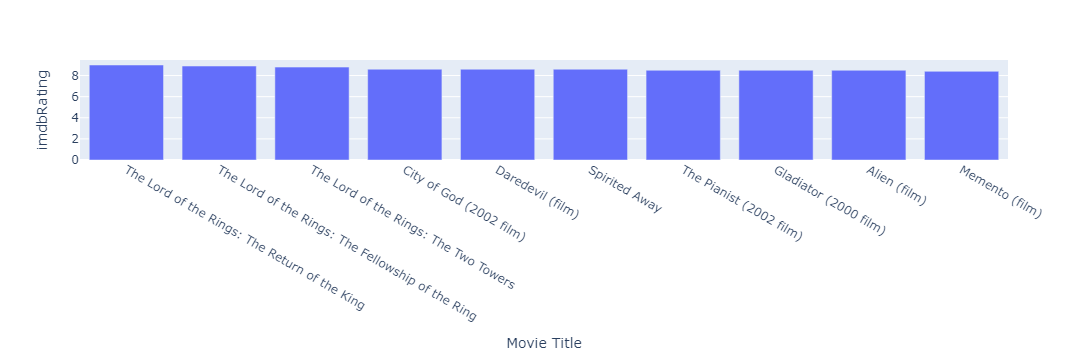

In [68]:
fig = px.bar(processed_df[['Movie Title', 'imdbRating', 'Year']].sort_values(by='imdbRating', ascending=False).head(10), x='Movie Title', y='imdbRating')
fig.show()

In [32]:
processed_df['Genre'].unique()

array(['Comedy', 'Comedy, Drama, Sport', 'Horror, Sci-Fi, Thriller',
       'Action, Crime, Thriller', 'Comedy, Drama, Romance',
       'Drama, Mystery, Thriller', 'Comedy, Crime, Drama',
       'Comedy, Crime, Romance', 'Horror, Mystery',
       'Adventure, Drama, Romance', 'Adventure, Comedy, Family',
       'Animation, Adventure, Comedy', 'Animation, Adventure, Family',
       'Comedy, Documentary', 'Crime, Drama, Thriller', 'Comedy, Drama',
       'Action, Horror, Sci-Fi', 'Comedy, Crime',
       'Animation, Comedy, Family, Sport', 'Comedy, Crime, Mystery',
       'Comedy, Drama, Family', 'Comedy, Sci-Fi', 'Drama, Romance',
       'Adventure, Sci-Fi, Thriller', 'Mystery, Thriller',
       'Biography, Drama', 'Horror, Thriller', 'Drama, Horror',
       'Crime, Drama', nan, 'Comedy, Drama, Music', 'Drama, Sport',
       'Action, Crime, Drama', 'Drama', 'Comedy, Sport',
       'Drama, Thriller, War', 'Crime, Drama, Horror',
       'Documentary, Short, Biography', 'Drama, Comedy, Crime

In [33]:
processed_df['Genre'].dropna(inplace=True)

In [34]:
genre_counts = processed_df['Genre'].value_counts().sort_values(ascending=False).head(10)

In [35]:
genre_counts

Genre
Comedy, Drama, Romance          47
Comedy, Romance                 37
Comedy                          36
Drama                           35
Drama, Romance                  28
Animation, Adventure, Comedy    22
Comedy, Drama                   22
Crime, Drama, Thriller          19
Action, Adventure, Comedy       19
Action, Crime, Drama            18
Name: count, dtype: int64

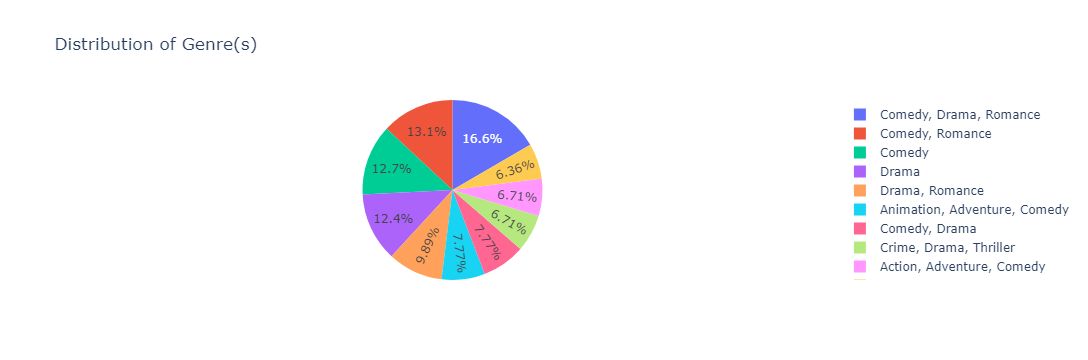

In [36]:
fig = px.pie(genre_counts, values=genre_counts, names=genre_counts.index, title='Distribution of Genre(s)')
fig.show()

# Corpus Build

In [60]:
def corpus(text):
    text = str(text)
    text_l = text.split()
    return text_l

In [61]:
processed_df['corp_list'] = processed_df['ProcessedPlot'].apply(corpus)

In [63]:
processed_df['corp_list'].head()

0    [kindhearted, clumsy, super, dave, osborne, bo...
1    [finding, deebo, escaped, prison, get, revenge...
2    [aging, prizefighter, longtime, best, friend, ...
3    [supernova, chronicle, searchandrescue, patrol...
4    [boston, irish, american, fraternal, twin, bro...
Name: corp_list, dtype: object

In [64]:
from tqdm import trange
corpus = []
for i in trange(processed_df.shape[0],ncols=150,nrows=10,colour='blue',smoothing=0.8):
    corpus+=processed_df['corp_list'][i]
len(corpus)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 5556/5556 [00:00<00:00, 31833.67it/s]


1808076

In [65]:
# most occuring words
from collections import Counter
common_words = Counter(corpus).most_common(10)
common_words

[('find', 8110),
 ('tell', 6361),
 ('one', 6290),
 ('take', 6056),
 ('go', 6008),
 ('back', 5539),
 ('get', 5277),
 ('father', 5275),
 ('friend', 5204),
 ('home', 5177)]

In [66]:
words = []
freq = []
for word, value in common_words:
    words.append(word)
    freq.append(value)

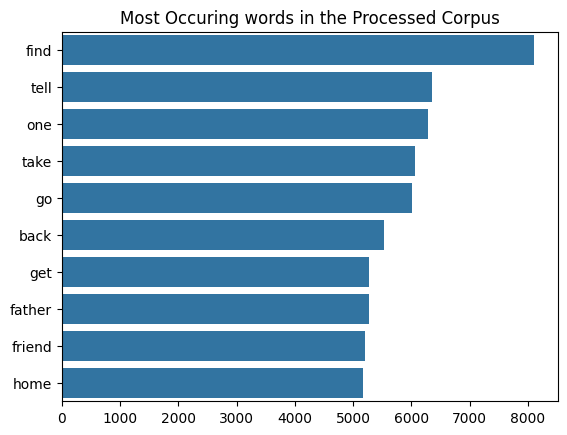

In [67]:
sns.barplot(x=freq,y=words)
plt.title('Most Occuring words in the Processed Corpus')
plt.show()

# Vectorisation and Prediction

In [37]:
kmeans = KMeans(n_clusters=10, random_state=42)
tf_idf_vectorizer = TfidfVectorizer()
bow_vectorizer = CountVectorizer()

In [38]:
def train_model(data, vectorizer):
    X = vectorizer.fit_transform(data)
    return kmeans.fit(X)

In [39]:
def find_similar_plot(input_plot, vectorizer, model):
    new_plot_vectorized = vectorizer.transform(input_plot)
    predicted_cluster = model.predict(new_plot_vectorized)

    similar_movies_indices = (model.labels_ == predicted_cluster).nonzero()[0]
    similar_movies = processed_df.iloc[similar_movies_indices][['Plot Summary']]

    return similar_movies

In [40]:
test_txt = ["1.. Super Dave, also known as Bob Einstein, is a kind and awkward man. He survives!!!!! a near-fatal accident and learns that his manager embezzled money, forcing him into bankruptcy and losing his house. After retiring from stunt work, he meets Sandy, a single mother, and becomes acquainted with her. Later, Sandy's son Timmy requires costly heart surgery. Super Dave must confront the process of raising money for retirement. Hedaya's archenemy Gil Ruston"]

In [41]:
text_txt1 = ["Character is dave also goes by the name of Einstein. Survives some accident"]

## Using TF-IDF

In [42]:
model = train_model(processed_df['ProcessedPlot'], tf_idf_vectorizer)

C:\Users\msani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [43]:
find_similar_plot(test_txt, tf_idf_vectorizer, model).iloc[0]['Plot Summary']

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"

In [44]:
find_similar_plot(text_txt1, tf_idf_vectorizer, model).iloc[0]['Plot Summary']

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"

## Using Bag of Words

In [52]:
model = train_model(processed_df['ProcessedPlot'], bow_vectorizer)

C:\Users\msani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [46]:
find_similar_plot(test_txt, bow_vectorizer, model).iloc[0]['Plot Summary']

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"

In [47]:
find_similar_plot(text_txt1, tf_idf_vectorizer, model).iloc[0]['Plot Summary']

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"

## Testing

In [49]:
processed_df.iloc[-1]['Plot Summary']

'In London, Marc enjoys a Christmas party with friends and Oliver, his husband of many years. Oliver leaves the party early to travel for a book signing in Paris and dies in a car accident just seconds after.\nIn the following year, Marc\'s best friends Sophie and Thomas try to help him through his grief. However, Marc opens a note from Oliver confessing he had met someone else. Then he discovers his husband had also been secretly leasing a flat in Paris.\nMarc brings Sophie and Thomas with him to the city, though he keeps the revelation a secret so the three can have a good time. Sophie, who had recently ended a serious relationship with her boyfriend Terrance, brings them to meet a date, which Marc leaves to spend time with Theo, a French man he had previously met at a London performance art exhibit.\nMarc admits that his anger at Oliver\'s secrets is distracting him from his grief. He also reveals that he gave up painting following the death of his mother, and he worries that he\'s 

In [50]:
test_txt2 = ["In London, Marc enjoys a Christmas party with friends and Oliver, his husband of many years. Oliver leaves the party early to travel for a book signing in Paris and dies in a car accident just seconds after.\nIn the following year, Marc\'s best friends Sophie and Thomas try to help him through his grief. However, Marc opens a note from Oliver confessing he had met someone else. Then he discovers his husband had also been secretly leasing a flat in Paris.\nMarc brings Sophie and Thomas with him to the city, though he keeps the revelation a secret so the three can have a good time. Sophie, who had recently ended a serious relationship with her boyfriend Terrance, brings them to meet a date, which Marc leaves to spend time with Theo, a French man he had previously met at a London performance art exhibit.\nMarc admits that his anger at Oliver\'s secrets is distracting him from his grief. He also reveals that he gave up painting following the death of his mother, and he worries that he\'s not properly grieving Oliver just as he didn\'t properly grieve her. Theo brings Marc to the Claude Monet room at the Musée de l\'Orangerie, explaining that it had been painted after the death of his family, and they kiss.\nThe next morning, Thomas berates the two for their abandonment, explaining that Sophie had been found sleeping at a bus station and he could not reach Marc. A man enters and introduces himself as Luca, a Berlin native who had won Oliver\'s art scholarship before growing closer to him, finally leading to Marc telling the truth about the nature of their trip."]

In [59]:
find_similar_plot(test_txt2, bow_vectorizer, model).iloc[0]['Plot Summary']

"After the kind-hearted but clumsy Super Dave Osborne (Bob Einstein) survives a near-fatal accident, he discovers his manager has embezzled from him. This forces him into bankruptcy and causes him to lose his house. Super Dave decides to retire from stunt work, but ends up meeting a single mother named Sandy (Gia Carides). When Super Dave learns that Sandy's son, Timmy (Carl Michael Lindner) needs an expensive heart surgery, Super Dave comes out of retirement to raise the money. In the process, he must face off against his arch-enemy, Gil Ruston (Dan Hedaya).\n"